In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import warnings # Current version of Seaborn generates a bunch of warnings that will be ignored.
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

# **Dimensionality reduction techniques**

Write a colab to demonstrate various dimensionality reduction techniques discussed in the class using 

a) any image data set (i gave examples of faces and digits data sets colabs in slides in links / notes)

b) any tabular data set (i gave example of iris data set in slides with colab links)

You need to showcase:

1. PCA
2. SVD
3. LLE
4. t-SNE
5. ISOMAP
6. UMAP

For the image dataset I will be using the mnist fashion dataset found at: https://github.com/zalandoresearch/fashion-mnist

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/fashion-mnist_train.csv')
df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,6,2,0,0,0,0,0,0,0,2,3,7,4,4,5,5,0,0,0,0,0,0,4,5,4,5,11,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,4,9,7,8,7,5,4,8,12,5,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,0,0,0,159,161,143,180,142,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,255,231,241,217,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,36,50,51,68,48,48,33,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,0,60,234,215,229,223,231,107,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,224,...,0,0,0,2,0,77,210,204,156,0,0,0,0,0,0,1,76,88,35,0,0,2,5,7,3,3,3,3,7,5,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,141,45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,238,229,227,223,255,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,220,215,210,198,185,188,194,177,189,198,203,214,166,0,0,0,0,0,0,0


I check the shape of the dataset that I can reduce the dimension

In [ ]:
df.shape

(60000, 785)

In [ ]:
df_label = df['label']
del df['label']

Since the dataset is very large I take a subset of the original dataset with only 1000 rows for performance reasons

In [ ]:
X = df.iloc[0:1000,:].to_numpy()
X_label = df_label.iloc[0:1000].to_numpy()

Here is the new shape of our dataset

In [ ]:
X.shape

(1000, 784)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, X_label, test_size = 0.2, random_state = 49)

# **PCA Dimension Reduction**

PCA is used to summarize information from data into few dimensions, so we can use labels to label the images.


In [ ]:
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

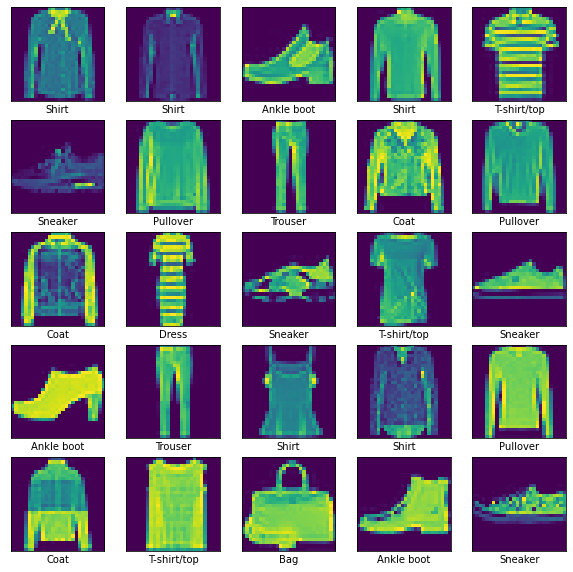

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap="viridis")
    plt.xlabel(label[y_train[i]])
plt.show()

In [ ]:
pca = PCA(n_components=5)
pca.fit(X_train)
X_5d = pca.transform(X_train)

In [ ]:
pca.explained_variance_ratio_[:10]

array([0.2860713 , 0.17465719, 0.0628297 , 0.05120317, 0.04372184])

In [ ]:
pca = PCA(n_components = 179)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

We can see the difference between the original image and the PCA reduced image, which can still be recognized as an overcoat.

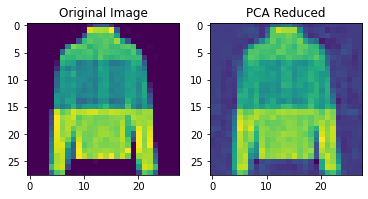

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(X_train[20].reshape(28, 28), cmap="viridis")
ax[0].set_title("Original Image")

ax[1].imshow(X_recovered[20].reshape(28, 28), cmap="viridis")
ax[1].set_title("PCA Reduced")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_reduction(X, y, min_distance=0.05, images=None):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=(12, 7))
    cmap = mpl.cm.get_cmap("Paired")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"size": 14})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

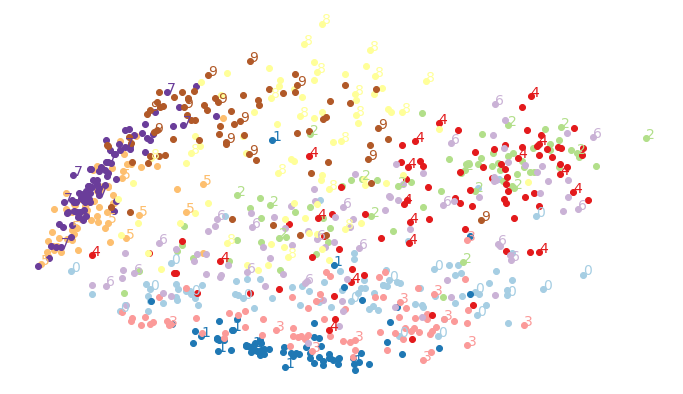

In [ ]:
X_5d = PCA(n_components=2, random_state=49).fit_transform(X_train)
plot_reduction(X_5d, y_train)
plt.show()

# **SVD**

Singular Value Decomposition, or SVD, is a computational method often employed to calculate principal components for a dataset. Using SVD to perform PCA is efficient and numerically robust.

In [ ]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=5)
svd.fit(X_train)
svd.transform(X_train)

array([[2326.54458936, -224.31465357,  559.16346384, -129.46657744,
        -318.8712791 ],
       [ 893.44016354,  -75.98108438,  249.88152621,  -99.91635003,
          83.59107301],
       [1965.87088265, 1480.91848925, -639.22594126,  216.49257984,
          80.44318106],
       ...,
       [2382.29656363,  832.78660571,  -45.45889199, 1432.74987917,
        -359.81293614],
       [3467.22364438,  878.69162631, -119.2204237 , 1670.24272491,
        -576.58752032],
       [3421.48335229, -882.81933759, -139.80255276,  187.1683372 ,
          22.32019236]])

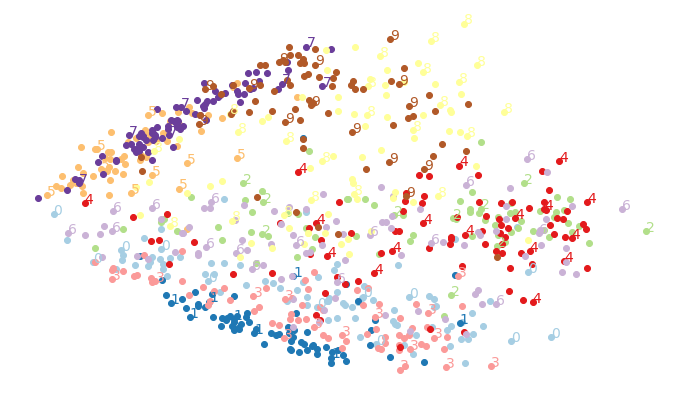

In [ ]:
X_svd = TruncatedSVD(n_components=2, n_iter=5, algorithm='randomized').fit_transform(X_train)
plot_reduction(X_svd, y_train)

# **TSNE**

R-distributed stochastic neighbor embedding (TSNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map.

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_reduced_tsne = tsne.fit_transform(X_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.047s...
[t-SNE] Computed neighbors for 800 samples in 1.061s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 544.856202
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.408607
[t-SNE] KL divergence after 300 iterations: 0.672243


Using the TSNE model it can be easier to see the clusters compared to the original PCA cluster.

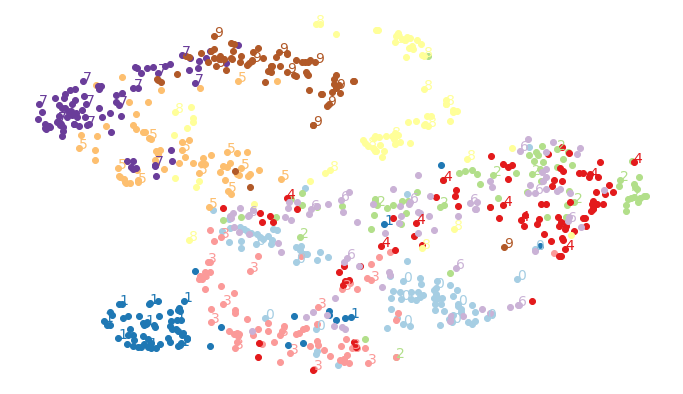

In [ ]:
plot_reduction(X_reduced_tsne, y_train)

# **LLE**

The LLE algorithm is an unsupervised method for dimensionality reduction. It tries to reduce these n-Dimensions while trying to preserve the geometric features of the original non-linear feature structure. It does not work very well for this dataset since it is non linear.

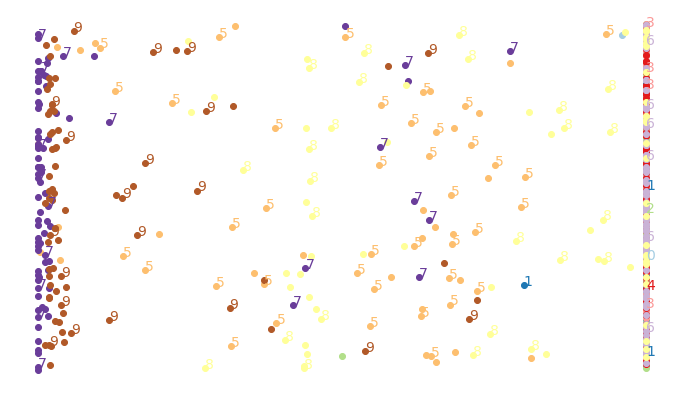

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

X_reduced_lle = LocallyLinearEmbedding(n_components=2, random_state=49).fit_transform(X_train)
plot_reduction(X_reduced_lle, y_train)

# **ISOMAP**

ISOMAP is Non-linear dimensionality reduction through Isometric Mapping. Parameter n_neighbors use to specify neighbors to choose for pair wise distance calculation.

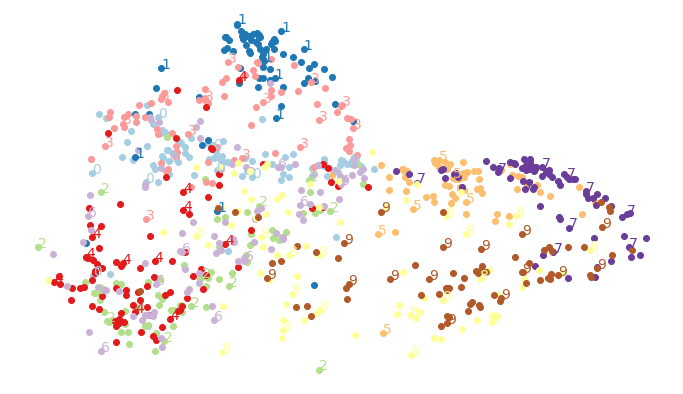

In [ ]:
from sklearn.manifold import Isomap

X_reduced_isomap = Isomap(n_components=2, n_neighbors=10, n_jobs=-1).fit_transform(X_train)
plot_reduction(X_reduced_isomap, y_train)

# **UMAP**

Uniform Manifold Approximation and Projection (UMAP) is a novel manifold learning technique for dimension reduction. It can be used to visualize the clusters nicely on the mnist dataset.

In [ ]:
!pip install umap-learn
import umap

  Using cached umap-learn-0.5.2.tar.gz (86 kB)
  Using cached pynndescent-0.5.5.tar.gz (1.1 MB)
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=13a7bffdc5933341afd8e2562c7c23104c9740799ddad3e31098725896eba234
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=2f4c0d080ce30bf6f8e111d756d07c6acdd05e6fefe0feb49131860c34bde81a
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


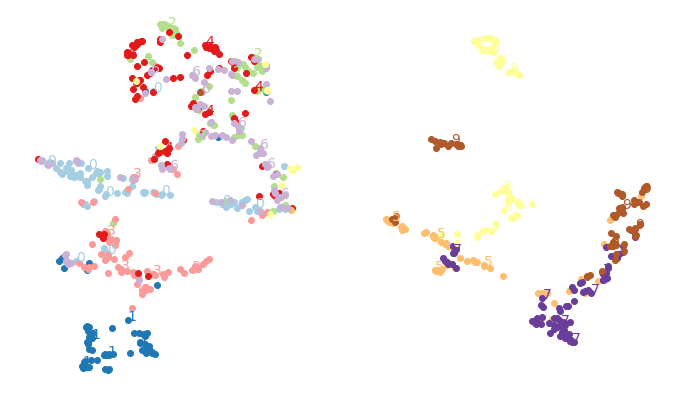

In [ ]:
X_reduced_umap = umap.UMAP(n_neighbors=5).fit_transform(X_train)
plot_reduction(X_reduced_umap, y_train)

# **Conclusion**

Overall I would recommend UMAP and ISOMAP since they preserve the structures of the cluster better than the other models.